In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Optional: improve plot aesthetics
sns.set(style="whitegrid")


In [3]:
# Load raw Togo dataset
df_togo = pd.read_csv("../data/togo-dapaong_qc.csv")

# Make a copy for cleaning
df_togo_clean = df_togo.copy()

# Preview the first few rows
df_togo_clean.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [4]:
# Numeric summary
df_togo_clean.describe()

# Missing values
missing = df_togo_clean.isna().sum()
missing_percent = (missing / len(df_togo_clean)) * 100
print("Missing values by column:\n", missing_percent)

# Columns with >5% missing
print("Columns with >5% missing:\n", missing_percent[missing_percent > 5])


Missing values by column:
 Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64
Columns with >5% missing:
 Comments    100.0
dtype: float64


In [5]:
# Key columns to check for outliers
key_cols = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']

# Fill missing values with median
for col in key_cols:
    df_togo_clean[col].fillna(df_togo_clean[col].median(), inplace=True)




C:\Users\It's Blue\AppData\Local\Temp\ipykernel_59388\3459099478.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_togo_clean[col].fillna(df_togo_clean[col].median(), inplace=True)


In [6]:
# Compute Z-scores
df_togo_clean[[col+'_zscore' for col in key_cols]] = df_togo_clean[key_cols].apply(zscore)

# Flag outliers (|Z|>3)
outliers = df_togo_clean[(df_togo_clean[[col+'_zscore' for col in key_cols]].abs() > 3).any(axis=1)]
print("Number of outliers detected:", len(outliers))

# Optionally drop or impute outliers
# Example: drop outliers
df_togo_clean = df_togo_clean[(df_togo_clean[[col+'_zscore' for col in key_cols]].abs() <= 3).all(axis=1)]

Number of outliers detected: 9251


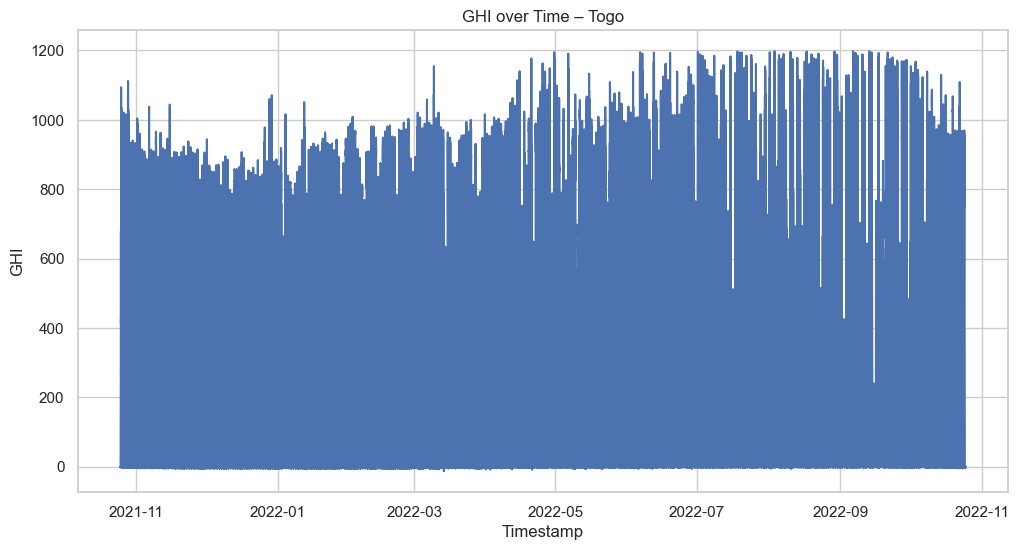

In [7]:
# Convert timestamp to datetime if not already
df_togo_clean['Timestamp'] = pd.to_datetime(df_togo_clean['Timestamp'])

# Plot GHI over time
plt.figure(figsize=(12,6))
plt.plot(df_togo_clean['Timestamp'], df_togo_clean['GHI'])
plt.title("GHI over Time – Togo")
plt.xlabel("Timestamp")
plt.ylabel("GHI")
plt.show()

# You can repeat for DNI, DHI, Tamb


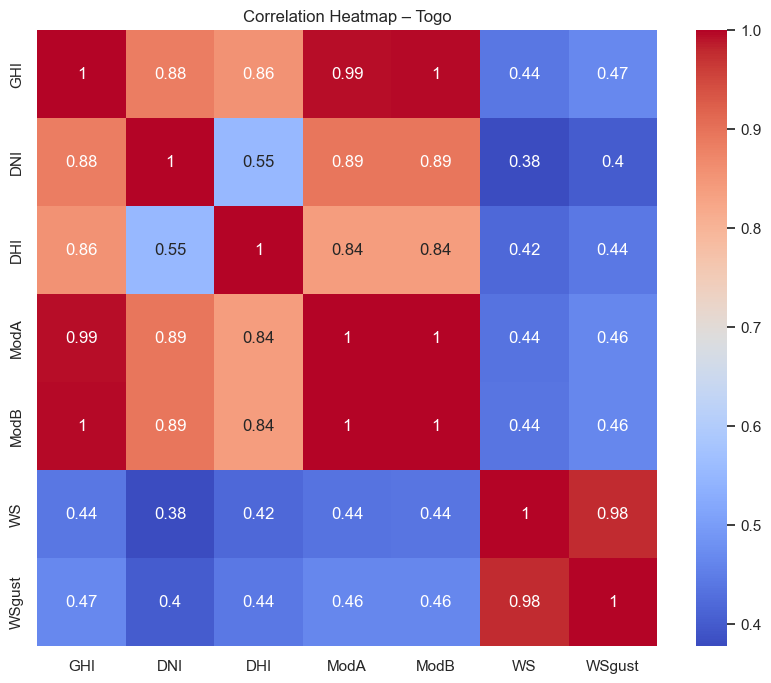

In [9]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_togo_clean[key_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap – Togo")
plt.show()




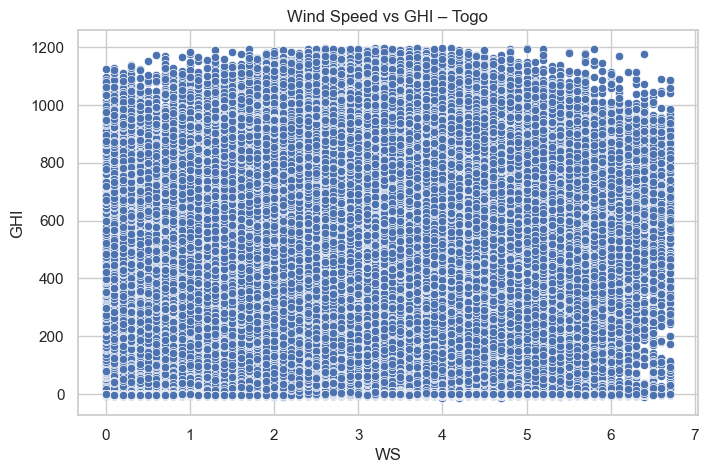

In [10]:
# Example scatter: WS vs GHI
plt.figure(figsize=(8,5))
sns.scatterplot(x='WS', y='GHI', data=df_togo_clean)
plt.title("Wind Speed vs GHI – Togo")
plt.show()

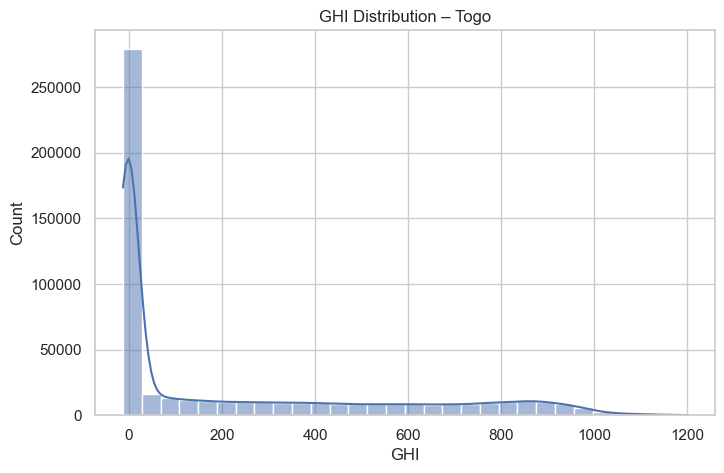

In [11]:
# Histogram for GHI
plt.figure(figsize=(8,5))
sns.histplot(df_togo_clean['GHI'], bins=30, kde=True)
plt.title("GHI Distribution – Togo")
plt.show()

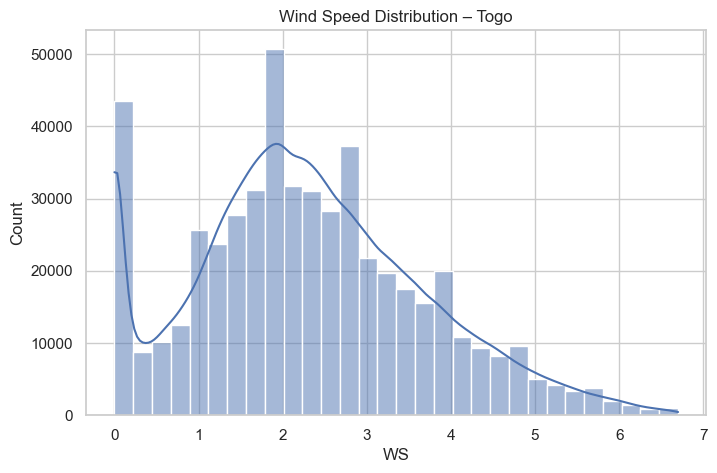

In [12]:

# Histogram for WS
plt.figure(figsize=(8,5))
sns.histplot(df_togo_clean['WS'], bins=30, kde=True)
plt.title("Wind Speed Distribution – Togo")
plt.show()

In [13]:
# Save cleaned Togo dataset (still in data/ folder, ignored by Git)
df_togo_clean.to_csv("data/togo_clean.csv", index=False)


In [14]:
# Save cleaned Togo dataset (still in data/ folder, ignored by Git)
df_togo_clean.to_csv("../data/togo_clean.csv", index=False)


In [15]:
# Save cleaned Togo dataset (still in data/ folder, ignored by Git)
df_togo_clean.to_csv("../notebooks/data/togo_clean.csv", index=False)
